In [3]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from sklearn.datasets import make_regression, make_classification, make_blobs
import matplotlib.pyplot as plt
import numpy as np

(80, 1)
(20, 1)
(80,)
(20,)


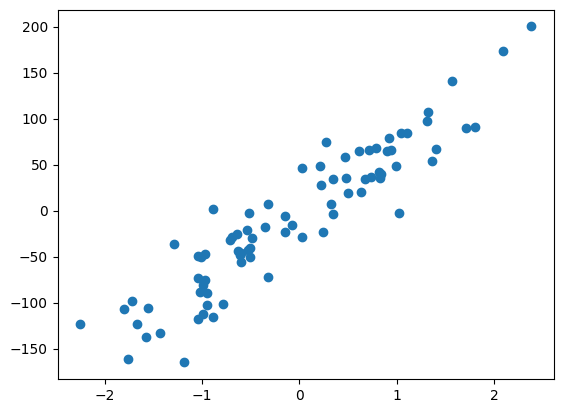

In [19]:
X, y = make_regression(n_samples=100, n_features=1, noise=30, random_state=50042)

# hace 100 muestras con una sola columna,noise es la dispersion de la regresion,random state fija un numero para que lo aleatorio sea repetible
# print("X",X[:10],X.shape)
# print("y",y[:10],y.shape)
train_x=X[:-20]
test_x=X[-20:]

train_y=y[:-20]
test_y=y[-20:]
plt.scatter(train_x,train_y)


print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

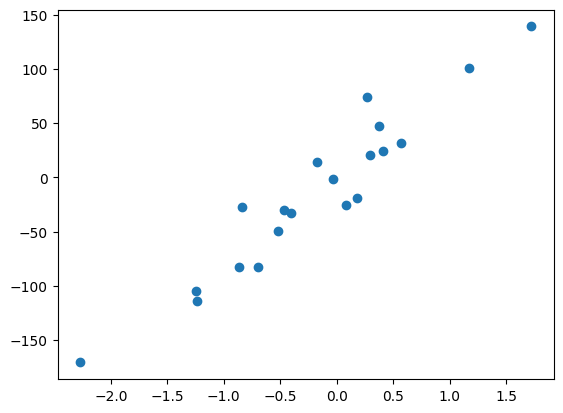

In [20]:
plt.scatter(test_x,test_y)

In [21]:
# params is an array of 2 positions where 1st position is m and second position is
params=60

def fn(data, params):
  return params*data

fn(train_x[:3], params)

array([[-31.86188247],
       [-53.50664759],
       [-37.64601734]])

0 -30
error 918926.2543230837 params -30
1 -28
error 885369.6161210266 params -28
2 -26
error 852486.747865048 params -26
3 -24
error 820277.6495551481 params -24
4 -22
error 788742.3211913266 params -22
5 -20
error 757880.7627735838 params -20
6 -18
error 727692.9743019196 params -18
7 -16
error 698178.955776334 params -16
8 -14
error 669338.707196827 params -14
9 -12
error 641172.2285633988 params -12
10 -10
error 613679.5198760491 params -10
11 -8
error 586860.581134778 params -8
12 -6
error 560715.4123395854 params -6
13 -4
error 535244.0134904715 params -4
14 -2
error 510446.3845874363 params -2
15 0
error 486322.5256304797 params 0
16 2
error 462872.43661960156 params 2
17 4
error 440096.1175548021 params 4
18 6
error 417993.5684360813 params 6
19 8
error 396564.78926343913 params 8
20 10
error 375809.7800368755 params 10
21 12
error 355728.5407563905 params 12
22 14
error 336321.0714219841 params 14
23 16
error 317587.37203365634 params 16
24 18
error 299527.4425914072 params 18

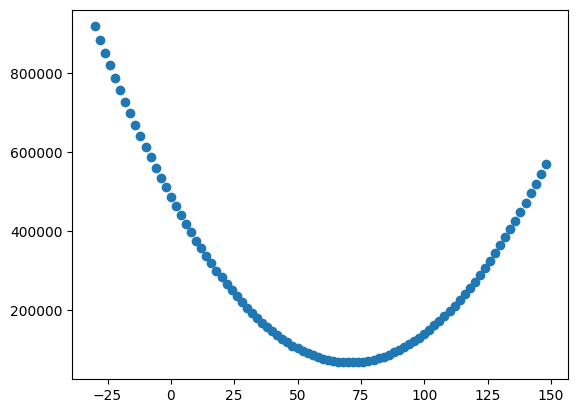

min 50 66462.5281665221
min idx 50
computing with params 70.0  with error  66462.5281665221


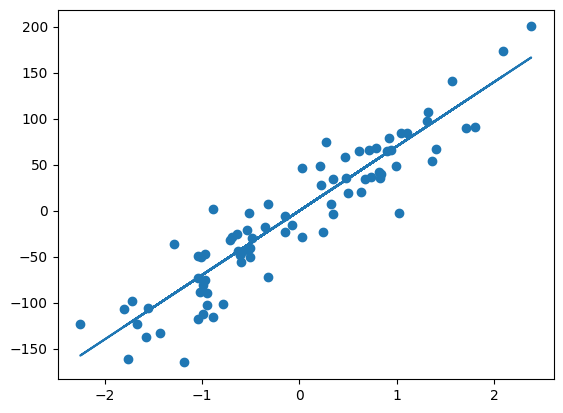

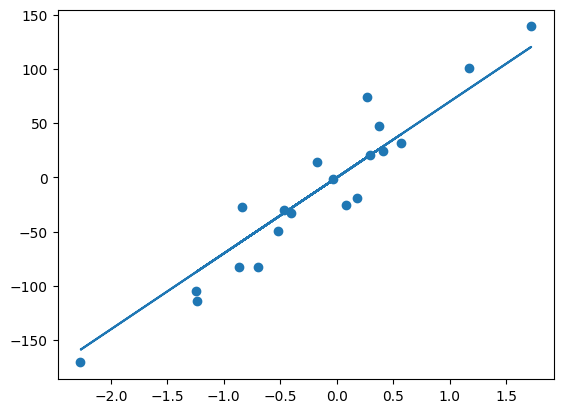

u 11005.376559578835
v 108210.49442687155
self_computed score (determination coeff) 0.8982965874255732


In [22]:
params=60

errors=[]
for i,m in enumerate(range(-30,150,2)):
  print(i,m)
  params=m
  train_y_pred=fn(train_x,params)

  error=np.average(((train_y.reshape((-1,1)) - train_y_pred)**2).sum())

  errors.append([i, error, params])

  # plt.scatter(train_x,train_y)
  # plt.scatter(train_x, train_y_pred)
  # plt.show()

  print("error",error, "params", params)

print(errors)
errors=np.array(errors)
plt.scatter(errors[:,2],errors[:,1])
plt.show()
print("min",errors[:,1].argmin(),errors[:,1].min())

idx=errors[:,1].argmin()    # obtiene el indice cuyo error es el menor registrado
print("min idx", idx)
params=errors[idx,2]
print("computing with params", params, " with error ", errors[idx,1])
train_y_pred=fn(train_x,params)

plt.scatter(train_x,train_y)
plt.plot(train_x, train_y_pred)
plt.show()

test_y_pred=fn(test_x,params)
plt.scatter(test_x,test_y)
plt.plot(test_x, test_y_pred)
plt.show()

u=((test_y.reshape((-1,1)) - test_y_pred)**2).sum()
print("u",u)

v=((test_y.reshape((-1,1)) - test_y.mean())**2).sum()
print("v",v)

print("self_computed score (determination coeff)", 1-(u/v))

In [23]:
def gradient(data, target, params):
  return -1*2*data*(target-data*params)

grad -148.66858739948347
error 486322.5256304797 params 1.4866858739948348
grad -145.5383240833668
error 468829.00549203955 params 2.9420691148285028
grad -142.47396943430363
error 452068.72042224056 params 4.366808809171539
grad -139.47413572482373
error 436011.02738413936 params 5.761550166419776
grad -136.5374644464901
error 420626.5620717159 params 7.126924810884677
grad -133.6626256946832
error 405887.1855882202 params 8.46355106783151
grad -130.8483175663384
error 391765.93334713974 params 9.772034243494893
grad -128.09326557036502
error 378236.9661031574 params 11.052966899198543
grad -125.3962220504782
error 365275.5230243311 params 12.306929119703325
grad -122.75596562018407
error 352857.87672042876 params 13.534488775905166
grad -120.17130060966096
error 340961.29014589003 params 14.736201782001775
grad -117.64105652428695
error 329563.9752992905 params 15.912612347244645
grad -115.16408751456822
error 318645.05364443647 params 17.064253222390327
grad -112.73927185722812
erro

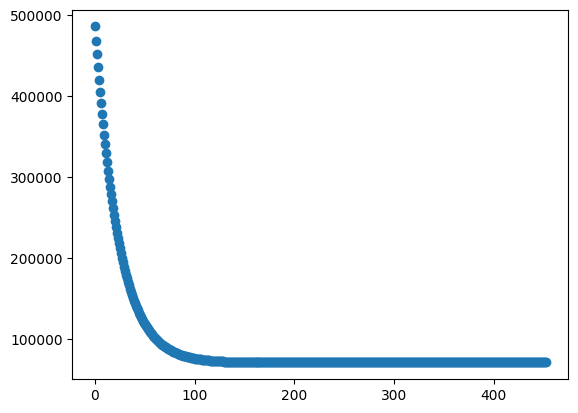

min 209 71358.4060283174
computing with params 69.78196173265349  with error  71358.4060283174


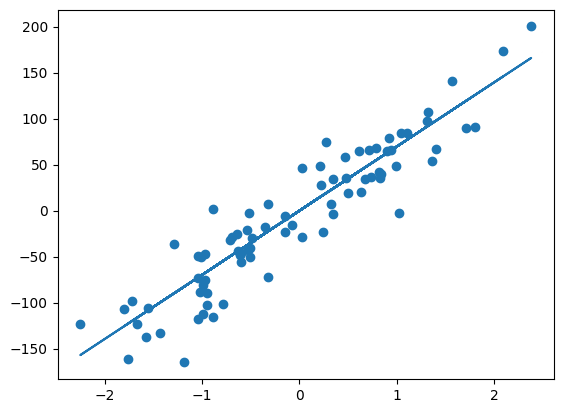

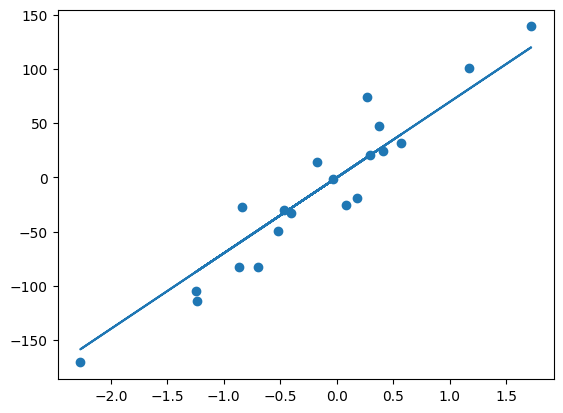

u 11076.896013944466
v 108210.49442687155
self_computed score (determination coeff) 0.8976356584210027


In [24]:
params=0
lr=0.01
alpha=1
errors=[]
epsilon=0.01
i=0
grad=-1
while -1*grad>epsilon:
# for i in range(1000):

  train_y_pred=fn(train_x,params)

  error=np.average(((train_y.reshape((-1,1)) - train_y_pred)**2).sum())+alpha*(params**2)

  errors.append([i, error, params])

  grad=gradient(train_x.reshape((-1,1)),train_y.reshape((-1,1)), params).mean()
  print("grad", grad)
  params=params-lr*grad

  # plt.scatter(train_x,train_y)
  # plt.scatter(train_x, train_y_pred)
  # plt.show()

  print("error",error, "params", params)
  i+=1

print(errors)
errors=np.array(errors)
plt.scatter(errors[:,0],errors[:,1])
plt.show()
print("min",errors[:,1].argmin(),errors[:,1].min())

idx=errors[:,1].argmin()
params=errors[idx,2]
print("computing with params", params, " with error ", errors[idx,1])
train_y_pred=fn(train_x,params)

plt.scatter(train_x,train_y)
plt.plot(train_x, train_y_pred)
plt.show()

test_y_pred=fn(test_x,params)
plt.scatter(test_x,test_y)
plt.plot(test_x, test_y_pred)
plt.show()

u=((test_y.reshape((-1,1)) - test_y_pred)**2).sum()
print("u",u)

v=((test_y.reshape((-1,1)) - test_y.mean())**2).sum()
print("v",v)

print("self_computed score (determination coeff)", 1-(u/v))

Coefficients: 
 [70.34855016]
Intercept: 
 -3.21565500597423
Mean squared error: 547.09
Coefficient of determination: 0.90
u 10941.759717283938
v 108210.49442687155
self_computed score (determination coeff) 0.8988844864332604


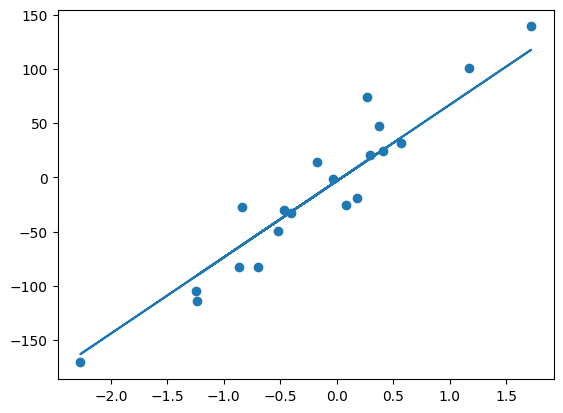

In [25]:
#encontrar la correlacion de los datos
lr_model=linear_model.LinearRegression()
#lr_model=linear_model.Ridge()

lr_model.fit(train_x, train_y)

test_y_predict = lr_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.plot(test_x, test_y_predict)

# The coefficients
print("Coefficients: \n", lr_model.coef_)

# The intercept
print("Intercept: \n", lr_model.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, test_y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, test_y_predict))

u=((test_y - test_y_predict)**2).sum()
print("u",u)

v=((test_y - test_y.mean())**2).sum()
print("v",v)

print("self_computed score (determination coeff)", 1-(u/v))


In [26]:
from sklearn.feature_selection import f_regression

f_regression(train_x, train_y)

(array([492.10476008]), array([1.97265212e-35]))

In [27]:
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(train_y, train_x).fit()

#view model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              499.3
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                    6.81e-36
Time:                        17:40:35   Log-Likelihood:                         -382.39
No. Observations:                  80   AIC:                                      766.8
Df Residuals:                      79   BIC:                                      769.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

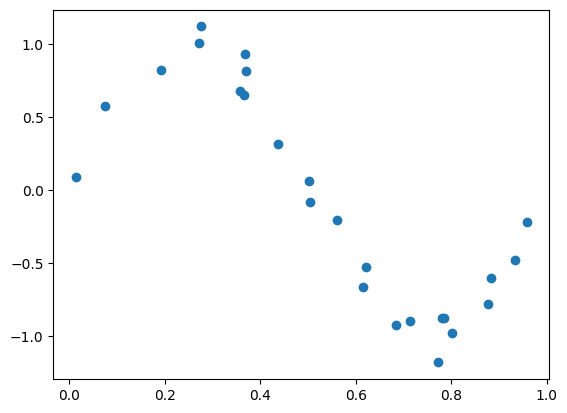

In [28]:
def func(x,a):
    return np.sin(a * np.pi * x)


size = 25
rng = np.random.RandomState(1234)
train_x = rng.uniform(0.0, 1.0, size)
train_y = func(train_x,2) + rng.normal(scale=0.1, size=size)
test_x = np.linspace(0.0, 1.0, 100)

plt.scatter(train_x,train_y)

Coefficients: 
 [[-2.17079703]]
Intercept: 
 [1.10370748]


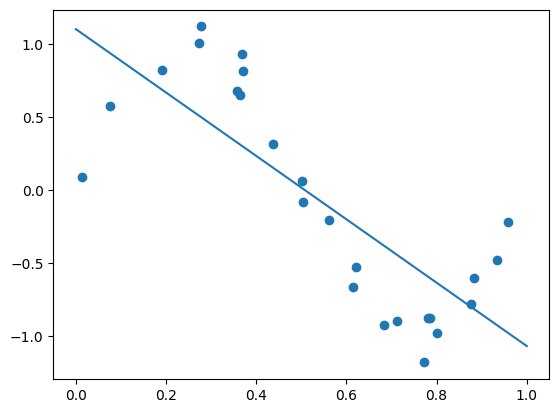

In [29]:
#encontrar la correlacion de los datos
lr_model=linear_model.LinearRegression()

lr_model.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

test_y_predict = lr_model.predict(test_x.reshape(-1,1))

plt.scatter(train_x,train_y)
plt.plot(test_x, test_y_predict)

# The coefficients
print("Coefficients: \n", lr_model.coef_)

# The intercept
print("Intercept: \n", lr_model.intercept_)


Coefficients: 
 [[-2.17079703]]
Intercept: 
 [1.10370748]
(array([1.98441042]), array([[0.00026286]]))


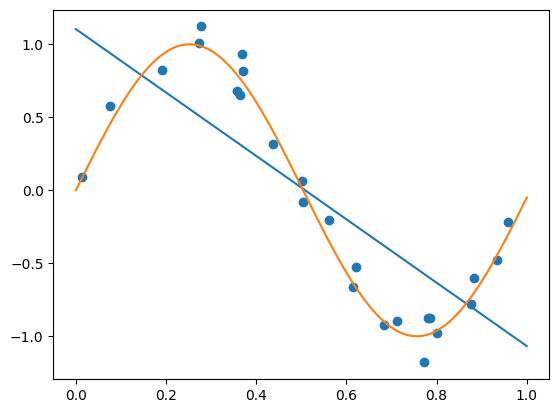

In [30]:
#encontrar la correlacion de los datos
lr_model=linear_model.LinearRegression()

lr_model.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

test_y_predict = lr_model.predict(test_x.reshape(-1,1))

plt.scatter(train_x,train_y)
plt.plot(test_x, test_y_predict)

# The coefficients
print("Coefficients: \n", lr_model.coef_)

# The intercept
print("Intercept: \n", lr_model.intercept_)

#----Polynomial Regression

from scipy.optimize import curve_fit

popt=curve_fit(func, train_x, train_y)
print(popt)

test_y_predict = func(test_x,popt[0])

plt.plot(test_x, test_y_predict)